#Analysis of Cost of Living by Country

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '/Cost_of_Living_Index_by_Country_2024.csv'
data = pd.read_csv(file_path)

# Select features for clustering
features = data[['Cost of Living Index', 'Rent Index', 'Groceries Index']]


# Scale the data for better clustering performance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

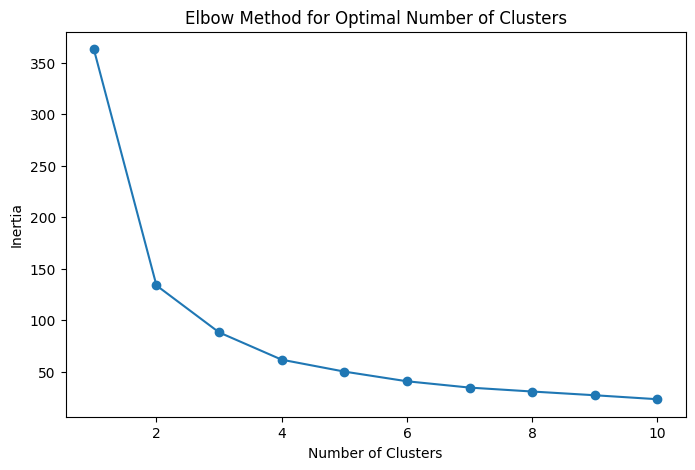

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Apply KMeans clustering with the chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)


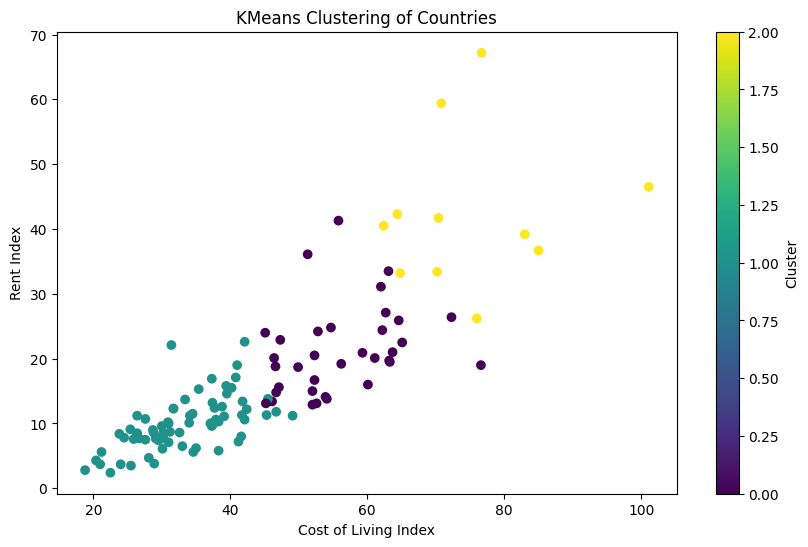

       Country  Cost of Living Index  Rent Index  Groceries Index  Cluster
0  Switzerland                 101.1        46.5            109.1        2
1      Bahamas                  85.0        36.7             81.6        2
2      Iceland                  83.0        39.2             88.4        2
3    Singapore                  76.7        67.2             74.6        2
4     Barbados                  76.6        19.0             80.8        0


In [ ]:

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Cost of Living Index'], data['Rent Index'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Cost of Living Index')
plt.ylabel('Rent Index')
plt.title('KMeans Clustering of Countries')
plt.colorbar(label='Cluster')
plt.show()

# Show the clustered data
print(data[['Country', 'Cost of Living Index', 'Rent Index', 'Groceries Index', 'Cluster']].head())


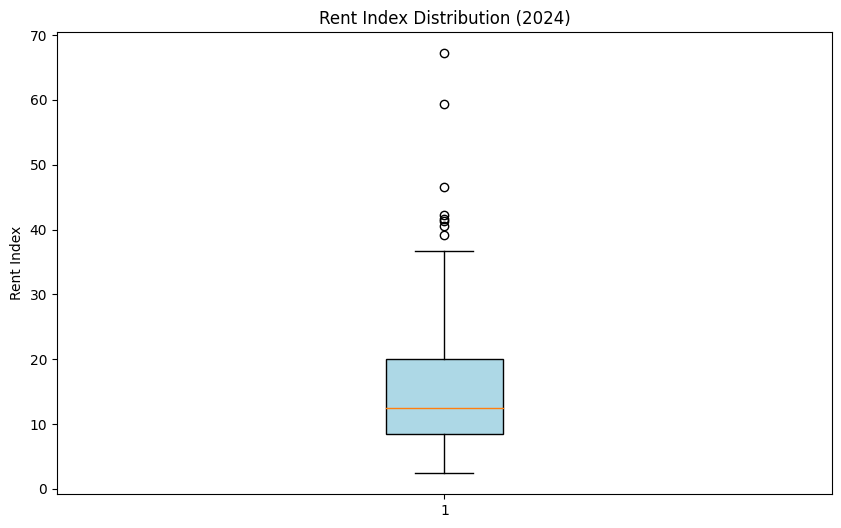

In [ ]:
# Box Plot: Rent Index Distribution
plt.figure(figsize=(10, 6))
plt.boxplot(data['Rent Index'], patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Rent Index Distribution (2024)')
plt.ylabel('Rent Index')
plt.show()